In [185]:
import face_recognition
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage import data, exposure
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
sns.set()
from skimage.filters import prewitt_h,prewitt_v
from skimage.io import imread, imshow
from skimage import measure
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.cluster import DBSCAN
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [186]:
model = VGG16(weights='imagenet', include_top=False)
model.summary()
vgg16_feature = []
for i in range(160):
    img_path = 'pets/pet_'+str(i)+'.png'
    img = image.load_img(img_path, target_size=(64, 64))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg16_feature.append(model.predict(img_data))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [187]:
print(np.shape(vgg16_feature))
feat = np.reshape(np.array(vgg16_feature).flatten(),(160,2048))
feat.shape

(160, 1, 2, 2, 512)


(160, 2048)

In [188]:
feat_ss = StandardScaler().fit_transform(feat)
print(np.shape(feat_ss))
# feat_ss

(160, 2048)


In [189]:
db = DBSCAN(eps=825, min_samples=9).fit(feat)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

if ((n_clusters_ ==2) and (n_clusters_!=0)):
    print("eps="+str(825)+" min="+str(9))
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

eps=825 min=9
Estimated number of clusters: 2
Estimated number of noise points: 26


In [190]:
# db = DBSCAN(eps=55, min_samples=20).fit(feat_ss)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)

Actual:     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Predicted:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0 -1 -1 -1
 -1 -1 -1  1  1  0  1 -1  0 -1  1 -1  0  0 -1  1  1  1 -1 -1 -1  1 -1 -1
 -1  0  0  0  0 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


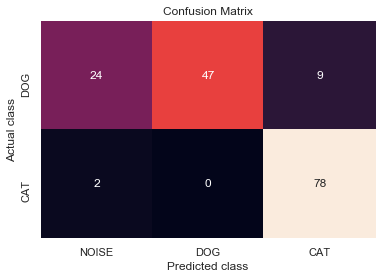

In [191]:
actual = []
for i in range(160):
    if i < 80:
        actual.append(0)
    else:
        actual.append(1)
print("Actual:    ",actual)
print("Predicted: ",labels)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(actual, labels)
matrix = np.delete(matrix, 0, 0)
# print(matrix)
sns.heatmap(matrix,annot=True,cbar=False,xticklabels=['NOISE','DOG','CAT'], yticklabels=['DOG','CAT'])
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()

In [195]:
labels2 = labels
for i in range(160):
    if i < 80:
        if labels2[i]==-1:
            labels2[i]=1 #wrong cluster instead of noise
    if i >= 80:
        if labels2[i]==-1:
            labels2[i]=0#wrong cluster instead of noise

In [196]:
labels2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

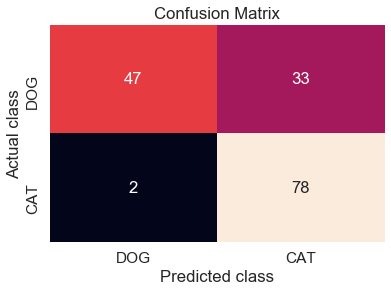

In [197]:
matrix = confusion_matrix(actual, labels2)
sns.set(font_scale=1.4) # for label size
sns.heatmap(matrix,annot=True,cbar=False,xticklabels=['DOG','CAT'], yticklabels=['DOG','CAT'])
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()

In [198]:
score = (matrix[0][0] + matrix[1][1])/sum(matrix.flatten())
print("Accuracy: "+str(score))

Accuracy: 0.78125


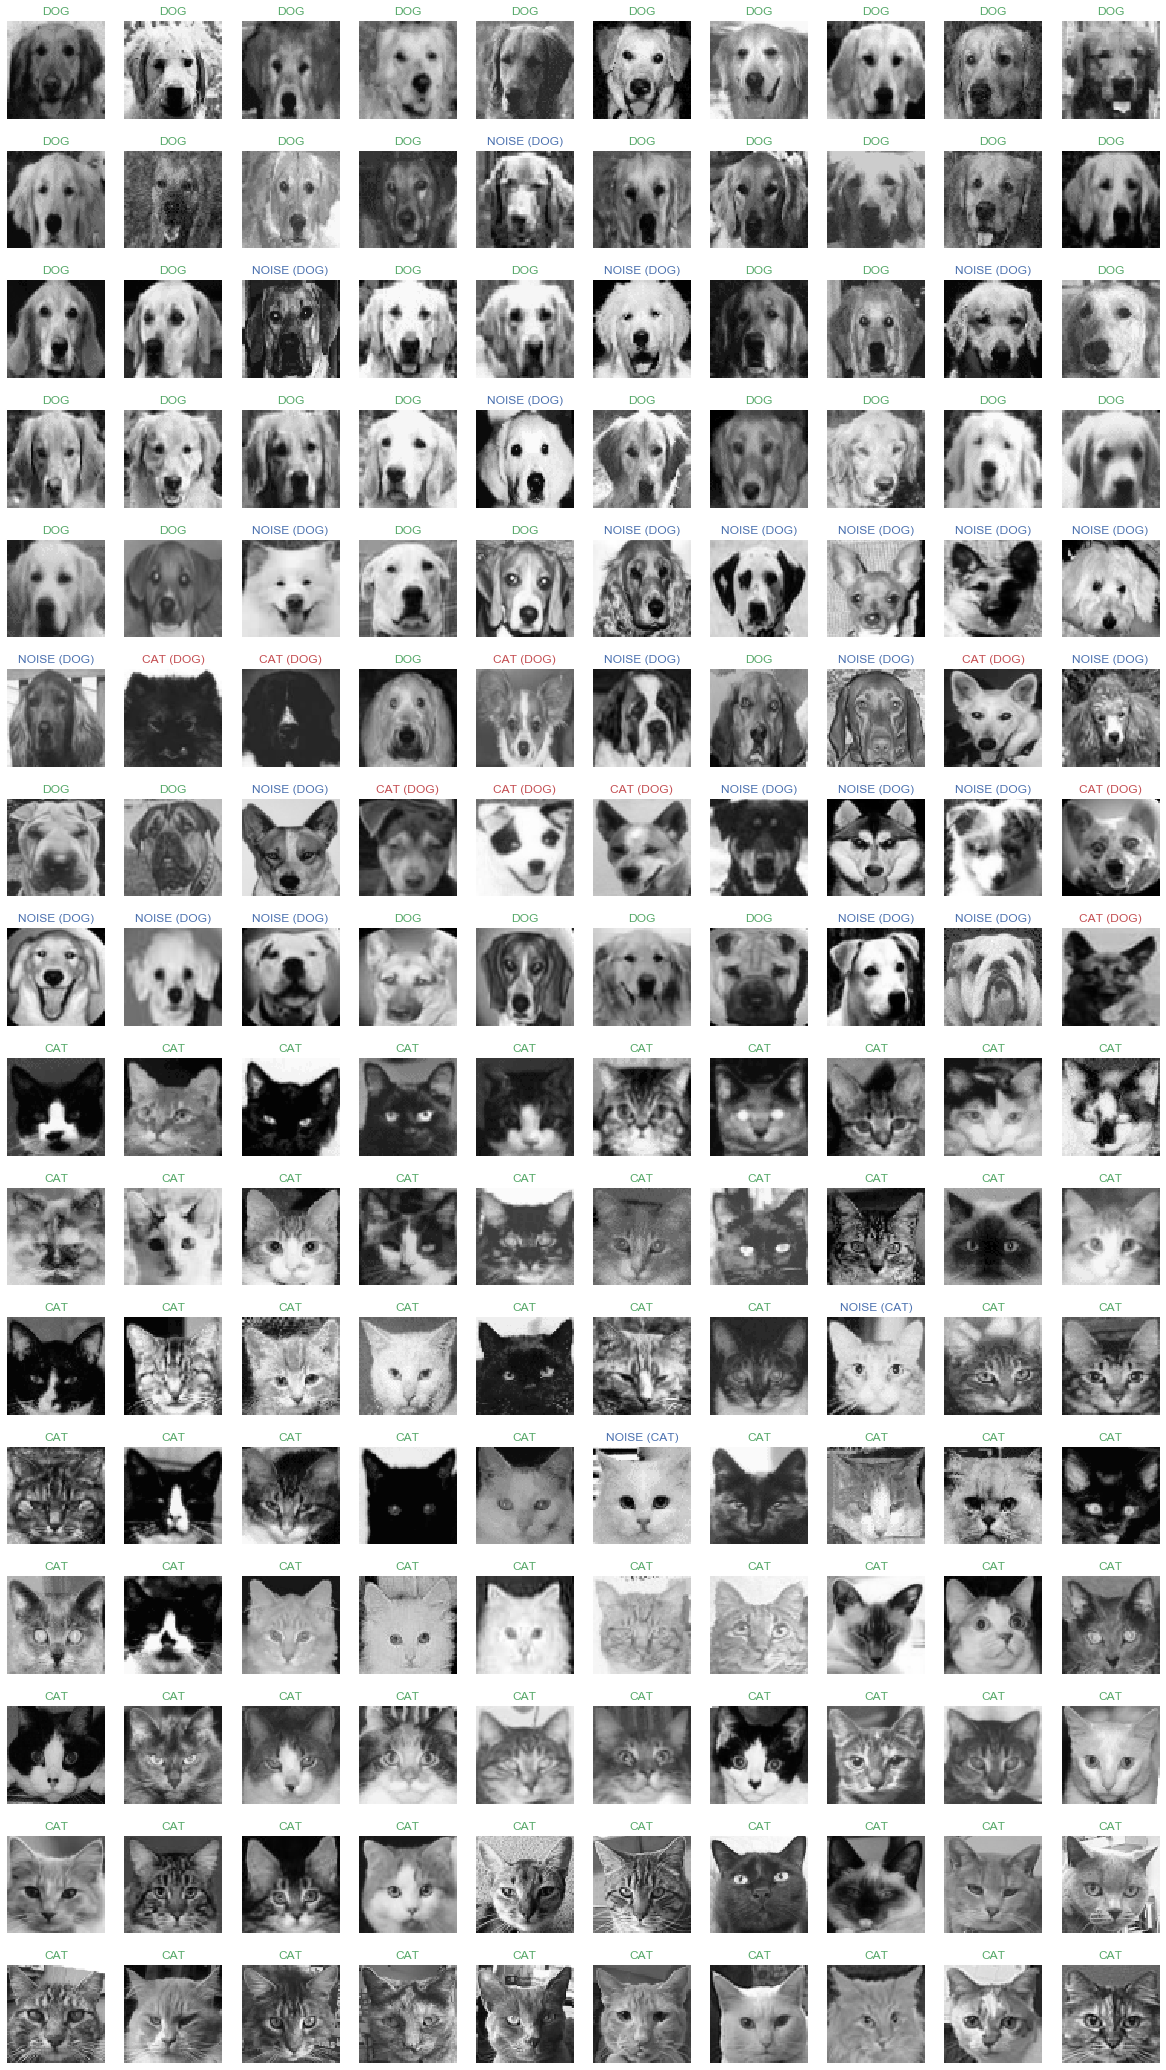

In [47]:
#Setup a figure 6 inches by 6 inches 
fig = plt.figure(figsize=(16,16)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.8, hspace=0.0) 
for i in range(160):
    img = cv2.imread('pets/pet_'+str(i)+'.png')
    ax = fig.add_subplot(16, 10, i+1, xticks=[], yticks=[])
    plt.axis('off')
    if labels[i]==0:
        if i<80:
            title_obj1 = plt.title('DOG') #get the title property handler
            plt.getp(title_obj1, 'text')
            plt.setp(title_obj1, color='g')
        if i>=80:
            title_obj1 = plt.title('DOG (CAT)') #get the title property handler
            plt.getp(title_obj1, 'text')
            plt.setp(title_obj1, color='r')
    elif labels[i]==(-1): 
        if i<80:
            title_obj3 = plt.title('NOISE (DOG)') #get the title property handler
            plt.getp(title_obj3, 'text')
            plt.setp(title_obj3, color='b')
        if i>=80:
            title_obj3 = plt.title('NOISE (CAT)') #get the title property handler
            plt.getp(title_obj3, 'text')
            plt.setp(title_obj3, color='b')
    elif labels[i]==1:
        if i<80:
            title_obj2 = plt.title('CAT (DOG)') #get the title property handler
            plt.getp(title_obj2, 'text')
            plt.setp(title_obj2, color='r')
        if i>=80:
            title_obj2 = plt.title('CAT') #get the title property handler
            plt.getp(title_obj2, 'text')
            plt.setp(title_obj2, color='g')
    plt.imshow(img)

In [199]:
core_samples

array([False,  True, False,  True, False, False, False,  True,  True,
        True,  True, False,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
        True, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [133]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(feat,labels))

Silhouette Coefficient: 0.211


In [142]:
#B(C) (between clusters distance)
def calculate_bc(points, assignments):
    nr_clustere=max(assignments)+1
    wc=0
    for k in range(nr_clustere):
        pointsincluster=points[assignments==k]
        points2=points[assignments!=k]
    
        for p in pointsincluster:
            wc+=np.sum((np.sqrt(np.sum((points2-p)**2,axis=1))))
    wc=wc/2
    return wc

print(calculate_bc(feat, db.labels_))

8105426.4296875


In [143]:
# W(C) (within cluster distance)
def calculate_wc(points, assignments):
    nr_clustere=max(assignments)+1
    wc=0
    for k in range(nr_clustere):
        pointsincluster=points[assignments==k]
   
        for point in pointsincluster:
            wc+=np.sum((np.sqrt(np.sum((pointsincluster-point)**2,axis=1))))
    wc=wc/2
    return wc

print(calculate_wc(feat, db.labels_))

4506739.330078125


In [140]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:gray']
MARKERS = ['o', 'v', 's', '<', '>', '8', '^', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

def plot2d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    
    if mode is not None:
        transformer = mode(n_components=2)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 2, 'plot2d only works with 2-dimensional data'


    plt.grid()
    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        plt.plot(ix[0], ix[1], 
                    c=COLORS[iyp%len(COLORS)], 
                    marker=MARKERS[iyt%len(MARKERS)])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            plt.plot(cx[0], cx[1], 
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')

    plt.show()

def plot3d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    if mode is not None:
        transformer = mode(n_components=3)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 3, 'plot2d only works with 3-dimensional data'

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.elev = 30
    ax.azim = 120

    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        ax.plot(xs=[ix[0]], ys=[ix[1]], zs=[ix[2]], zdir='z',
                    c=COLORS[iyp%len(COLORS)], 
                    marker=MARKERS[iyt%len(MARKERS)])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            ax.plot(xs=[cx[0]], ys=[cx[1]], zs=[cx[2]], zdir='z',
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')
    plt.show()

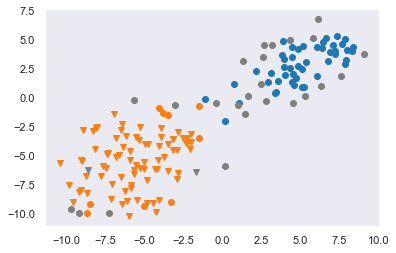

In [146]:
plot2d(feat, db.labels_, actual, mode=TSNE)

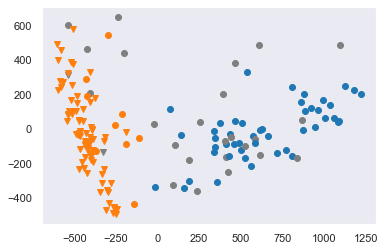

In [147]:
plot2d(feat, db.labels_, actual, mode=PCA)